In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler

In [20]:
df = pd.read_csv(r'dataset\CC GENERAL.csv')

In [21]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [23]:
df.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CUST_ID                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_TRX                         0
PAYMENTS                              0
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [24]:
df = df.dropna()

In [25]:
df = df.drop(columns=['CUST_ID'])

In [26]:
df.fillna(df.mean(), inplace=True)

In [31]:
features = df

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [47]:

kmeans = KMeans(n_clusters=4, random_state=12345)
kmeans_labels = kmeans.fit_predict(scaled_features)

dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)


kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(scaled_features, kmeans_labels)
dbscan_silhouette = silhouette_score(scaled_features, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(scaled_features, dbscan_labels)

rand_index = adjusted_rand_score(kmeans_labels, dbscan_labels)

print("KMeans Silhouette Score:", kmeans_silhouette)
print("KMeans Davies-Bouldin Index:", kmeans_davies_bouldin)
print("DBSCAN Silhouette Score:", dbscan_silhouette)
print("DBSCAN Davies-Bouldin Index:", dbscan_davies_bouldin)
print("Rand Index between KMeans and DBSCAN:", rand_index)

KMeans Silhouette Score: 0.2004866872384794
KMeans Davies-Bouldin Index: 1.557067601658335
DBSCAN Silhouette Score: -0.2614133940003464
DBSCAN Davies-Bouldin Index: 1.5186671864123764
Rand Index between KMeans and DBSCAN: 0.14924272392576965


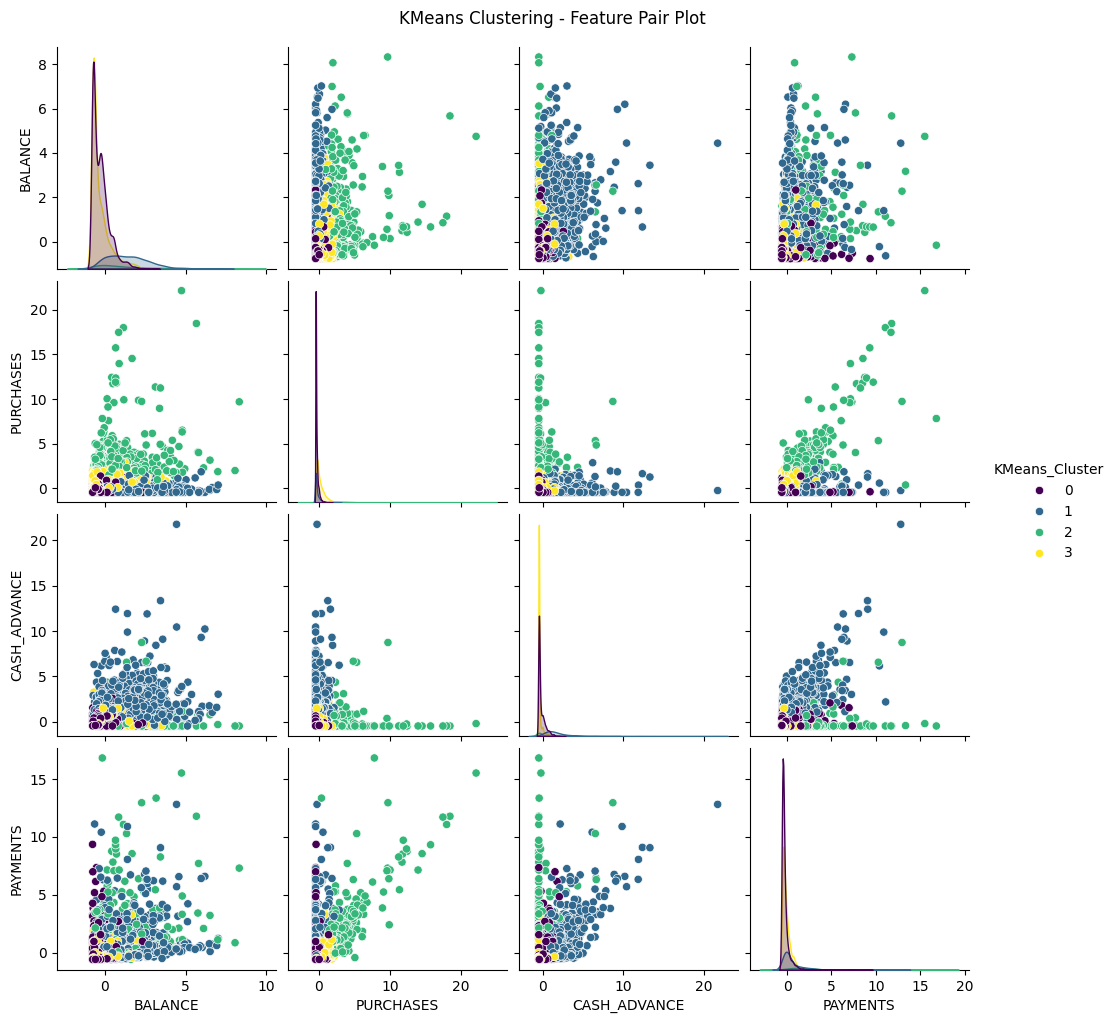

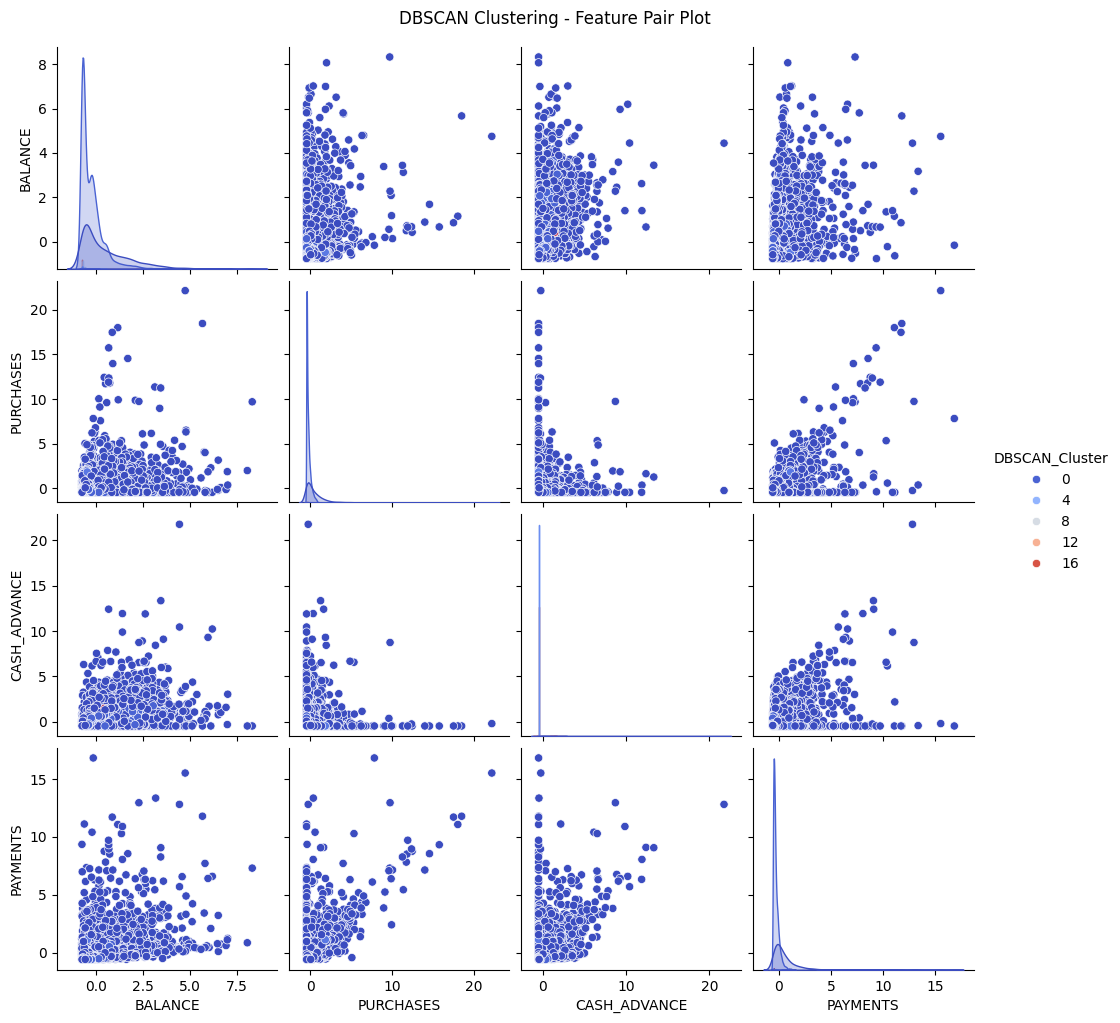

In [ ]:
feature_df = pd.DataFrame(scaled_features, columns=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 
                                                    'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
                                                    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
                                                    'ONEOFF_PURCHASES_FREQUENCY', 
                                                    'PURCHASES_INSTALLMENTS_FREQUENCY', 
                                                    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 
                                                    'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
                                                    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])

feature_df['KMeans_Cluster'] = kmeans_labels
feature_df['DBSCAN_Cluster'] = dbscan_labels

sns.pairplot(feature_df, vars=['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS'], hue='KMeans_Cluster', palette="viridis")
plt.suptitle("KMeans Clustering - Feature Pair Plot", y=1.02)
plt.show()

sns.pairplot(feature_df, vars=['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS'], hue='DBSCAN_Cluster', palette="coolwarm")
plt.suptitle("DBSCAN Clustering - Feature Pair Plot", y=1.02)
plt.show()


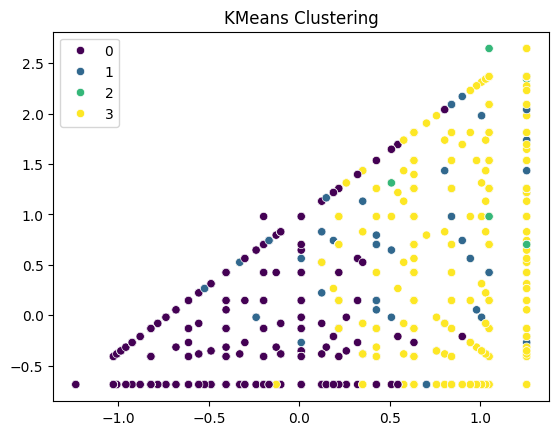

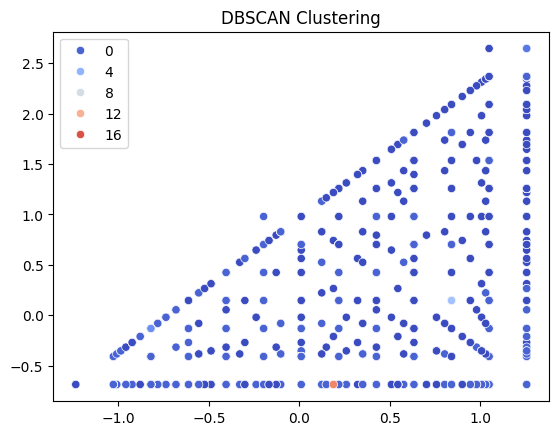

In [50]:
sns.scatterplot(x=scaled_features[:, 6], y=scaled_features[:, 7], hue=kmeans_labels, palette="viridis")
plt.title("KMeans Clustering")
plt.show()

sns.scatterplot(x=scaled_features[:, 6], y=scaled_features[:, 7], hue=dbscan_labels, palette="coolwarm")
plt.title("DBSCAN Clustering")
plt.show()